# SimuPark: Fake Times

392.47197860023283


Text(0, 0.5, 'Frecuencia')

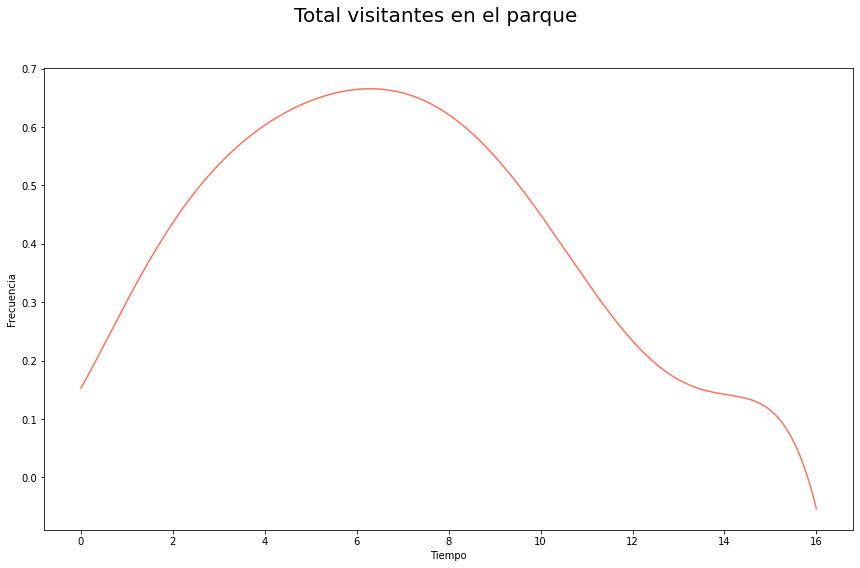

In [2]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

fig = gcf()
fig.set_size_inches(14.5, 8.5)

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (((0.631012633902875 * ((x+1) ** 0 ) + 0.141641794969108 * ((x+1) ** 1 ) + 1.08320562754808 * ((x+1) ** 2 ) + -0.386896805430061 * ((x+1) ** 3 ) + 0.0645561077512354 * ((x+1) ** 4 ) + -0.00580069833046977 * ((x+1) ** 5 ) + 0.000263776181717327 * ((x+1) ** 6 ) + -4.72376212119374e-06 * ((x+1) ** 7 ))) / 10)

print(sum(fn(x, k)))

plot(x, fn(x,k), color='#ff725e')
fig.suptitle('Total visitantes en el parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')

In [3]:
from simuPark.park import Activity, Attraction, FakeTimesPark
from simuPark.person import Person, Archetype
import random

guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'total_wait_time',
    'average_wait_time',
    ]

for i in range(4):
    park = FakeTimesPark(
        fn=fn
    )

    park.start_day(max_entry_rate=95000/960)


    for guest in park.guests:
        current_guest = []

        current_guest.append(guest.archetype)
        current_guest.append(guest.arrival_time)
        current_guest.append(guest.departure_time)
        current_guest.append(guest.departure_time - guest.arrival_time)
        current_guest.append(guest.max_wait)
        current_guest.append(guest.attractions_experienced)
        current_guest.append(guest.total_wait_time)
        if guest.attractions_experienced == 0:
            current_guest.append(0)
        else: 
            current_guest.append(guest.total_wait_time / guest.attractions_experienced)

        guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df.to_csv(r'./datasets/FTP.csv')

Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:17<00:00, 54.45it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:17<00:00, 53.84it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:17<00:00, 54.99it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:18<00:00, 50.86it/s] 


38851
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['DINOSAUR', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids', 'Kilimanjaro Safaris', "Na'vi River Journey", 'TriceraTop Spin']
['Tourist', 'Average', 'Activity Enjoyer', 'Attraction Enjoyer', 'All Day Park', 'Relaxed Visitor']


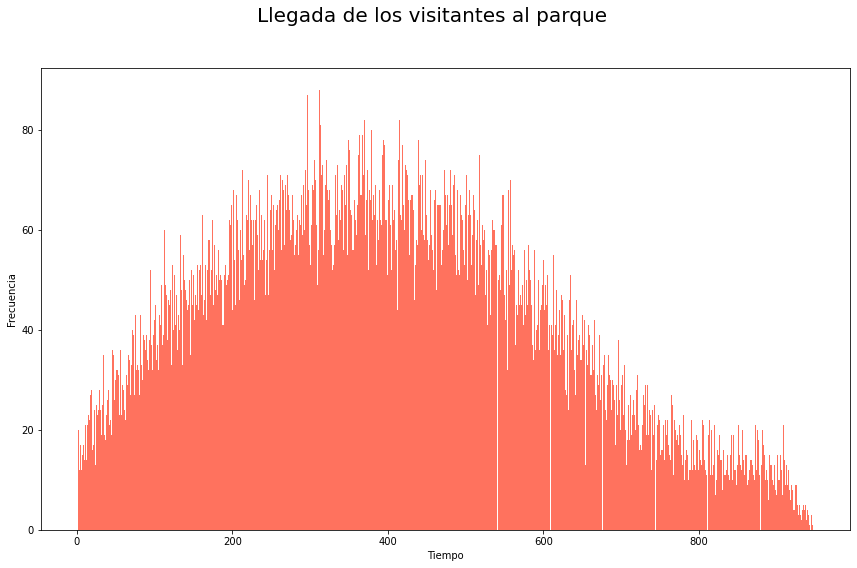

In [14]:
print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [15]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df.to_csv(r'./datasets/FTP.csv')
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,total_wait_time,average_wait_time
0,Relaxed Visitor,1,351,350,25,4,33,8.250000
1,Tourist,1,468,467,60,12,221,18.416667
2,Relaxed Visitor,1,308,307,25,1,2,2.000000
3,Relaxed Visitor,1,318,317,25,2,7,3.500000
4,Activity Enjoyer,1,261,260,10,6,22,3.666667
...,...,...,...,...,...,...,...,...
38846,Tourist,945,960,15,60,0,0,0.000000
38847,Relaxed Visitor,945,960,15,25,0,0,0.000000
38848,Relaxed Visitor,945,960,15,25,0,0,0.000000
38849,Attraction Enjoyer,946,960,14,70,1,10,10.000000


Atracciones experimentadas promedio: 3.604797817302
Atracciones experimentadas desviación estandar: 3.1150663978090627


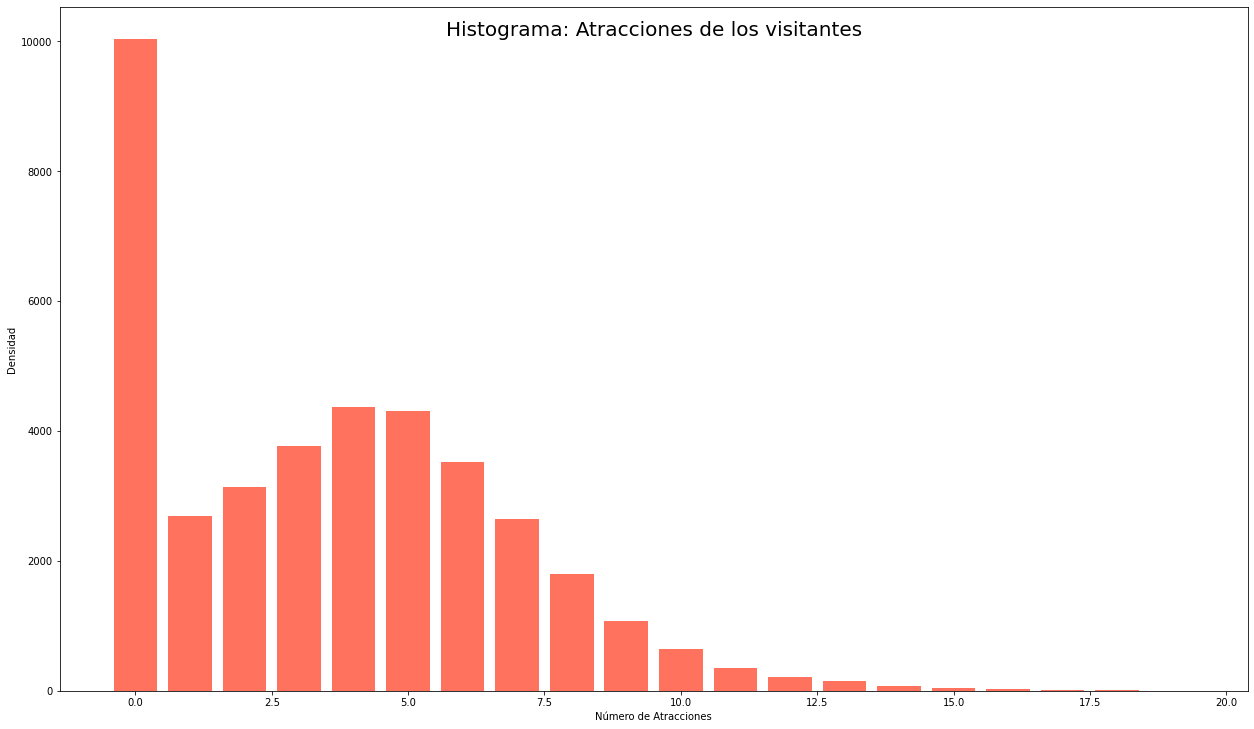

In [16]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]

for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(16.5, 9.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('Histograma: Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

29.75113512408445
(29.61484896943274, 29.88742127873616)
28822
88.0


Text(0, 0.5, 'Densidad')

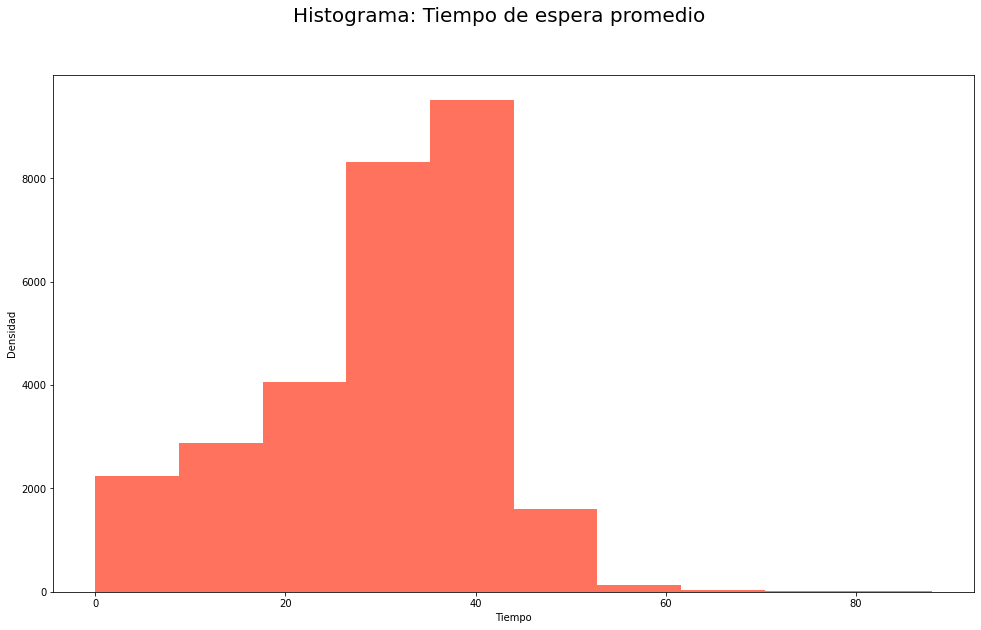

In [19]:
import scipy.stats as st

avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced == 0:
        continue

    avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)

print(np.mean(avgWaitTime))
print(st.t.interval(alpha=0.95, df=len(avgWaitTime)-1, loc=np.mean(avgWaitTime), scale=st.sem(avgWaitTime)))
print(len(avgWaitTime))
print(max(avgWaitTime))

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(avgWaitTime,  color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')


In [18]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,DINOSAUR,25
1,Expedition Everest,15
2,Flight of Passage,35
3,Kali River Rapids,15
4,Kilimanjaro Safaris,15
5,Na'vi River Journey,30
6,TriceraTop Spin,0


In [20]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.attractions_experienced == max(labels)][0].report()


id: 209  arvTime: 13 things_done: ['Kilimanjaro Safaris', 'Kali River Rapids', "Na'vi River Journey", 'DINOSAUR', 'DINOSAUR', "Na'vi River Journey", 'Flight of Passage', 'Expedition Everest', 'Kali River Rapids', 'DINOSAUR', 'Kilimanjaro Safaris', "Na'vi River Journey", 'Kilimanjaro Safaris', 'Kilimanjaro Safaris', 'Kali River Rapids', 'Kilimanjaro Safaris', 'Kilimanjaro Safaris', 'DINOSAUR', 'Kali River Rapids'] attrExp: 19
queues_joined: 0 total_wait_time: 261 archetype: Attraction Enjoyer


In [21]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.total_wait_time / guest.attractions_experienced == max(avgWaitTime)][0].report()


id: 37467  arvTime: 822 things_done: ['Flight of Passage'] attrExp: 1
queues_joined: 0 total_wait_time: 88 archetype: Tourist


In [22]:
len([guest for guest in park.guests if guest.attractions_experienced == 0])

10029